<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 6: Practical - Beyond Linearity <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani - Arman Malekzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Mohammad Javad Maheronnaghsh
___

# Intro

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town<br>
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
- INDUS - proportion of non-retail business acres per town.<br>
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
- NOX - nitric oxides concentration (parts per 10 million)<br>
- RM - average number of rooms per dwelling<br>
- AGE - proportion of owner-occupied units built prior to 1940<br>
- DIS - weighted distances to five Boston employment centres<br>
- RAD - index of accessibility to radial highways<br>
- TAX - full-value property-tax rate per `$`10,000<br>
- PTRATIO - pupil-teacher ratio by town<br>
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
- LSTAT - % lower status of the population<br>
- MEDV - Median value of owner-occupied homes in $1000's<br>

# Libraries

In [ ]:
# You can use thes following packages

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import itertools

# Sec 1: Data Exploration and Preprocessing (30)

Download the dataset

In [ ]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2023-05-25 06:29:16--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  34.90K  --.-KB/s    in 0.001s  

2023-05-25 06:29:17 (42.1 MB/s) - ‘BostonHousing.csv’ saved [35735/35735]



Load the dataset as a dataframe **(S1-1: 2 points)**

In [ ]:
df = pd.read_csv('BostonHousing.csv')

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


For each of the features, check the number of unique values **(S1-2: 2 points)**

In [ ]:
for column in df:
  set_ = set(df[column])
  print('****')
  print('Column Name: ', column)
  print(len(set_))

****
Column Name:  crim
504
****
Column Name:  zn
26
****
Column Name:  indus
76
****
Column Name:  chas
2
****
Column Name:  nox
81
****
Column Name:  rm
446
****
Column Name:  age
356
****
Column Name:  dis
412
****
Column Name:  rad
9
****
Column Name:  tax
66
****
Column Name:  ptratio
46
****
Column Name:  b
357
****
Column Name:  lstat
455
****
Column Name:  medv
229


Check if there are any null values in the dataframe (and remove them if they exist) **(S1-3: 2 points)**

In [ ]:
if df.isnull().values.any():
    print("Null values exist in the dataframe")
    df.dropna(inplace=True)
    print("Null values removed from the dataframe")
else:
    print("No null values found in the dataframe")

No null values found in the dataframe


We want to predict prices. Therefore, we'll have `medv` as our target. Make a list of the features other than the target. **(S1-4: 2 points)**

In [ ]:
features = set([x for x in df]) - {'medv'}

In [ ]:
features

{'age',
 'b',
 'chas',
 'crim',
 'dis',
 'indus',
 'lstat',
 'nox',
 'ptratio',
 'rad',
 'rm',
 'tax',
 'zn'}

Plot a boxplot for each of the features **(S1-5: 2 points)**

[]

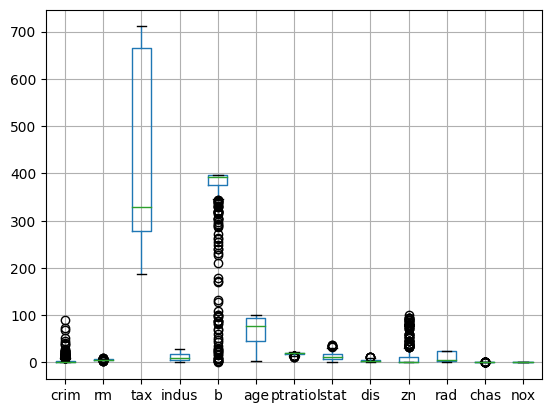

In [ ]:
b_plot = df.boxplot(column = list(features)) 
b_plot.plot() 

Plot the historgram of the target **(S1-6: 5 points)**

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

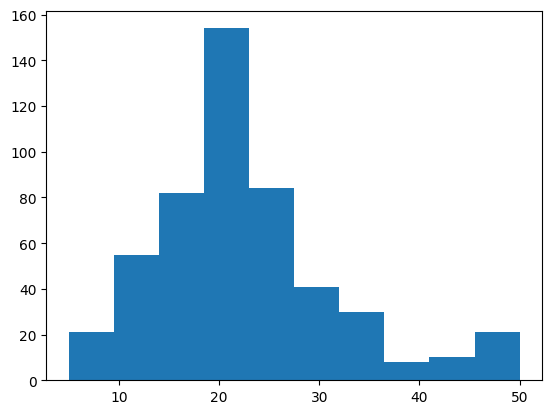

In [ ]:
plt.hist(df['medv'])

Have a look at the pair-plot of the dataframe's columns **(S1-7: 5 points)**

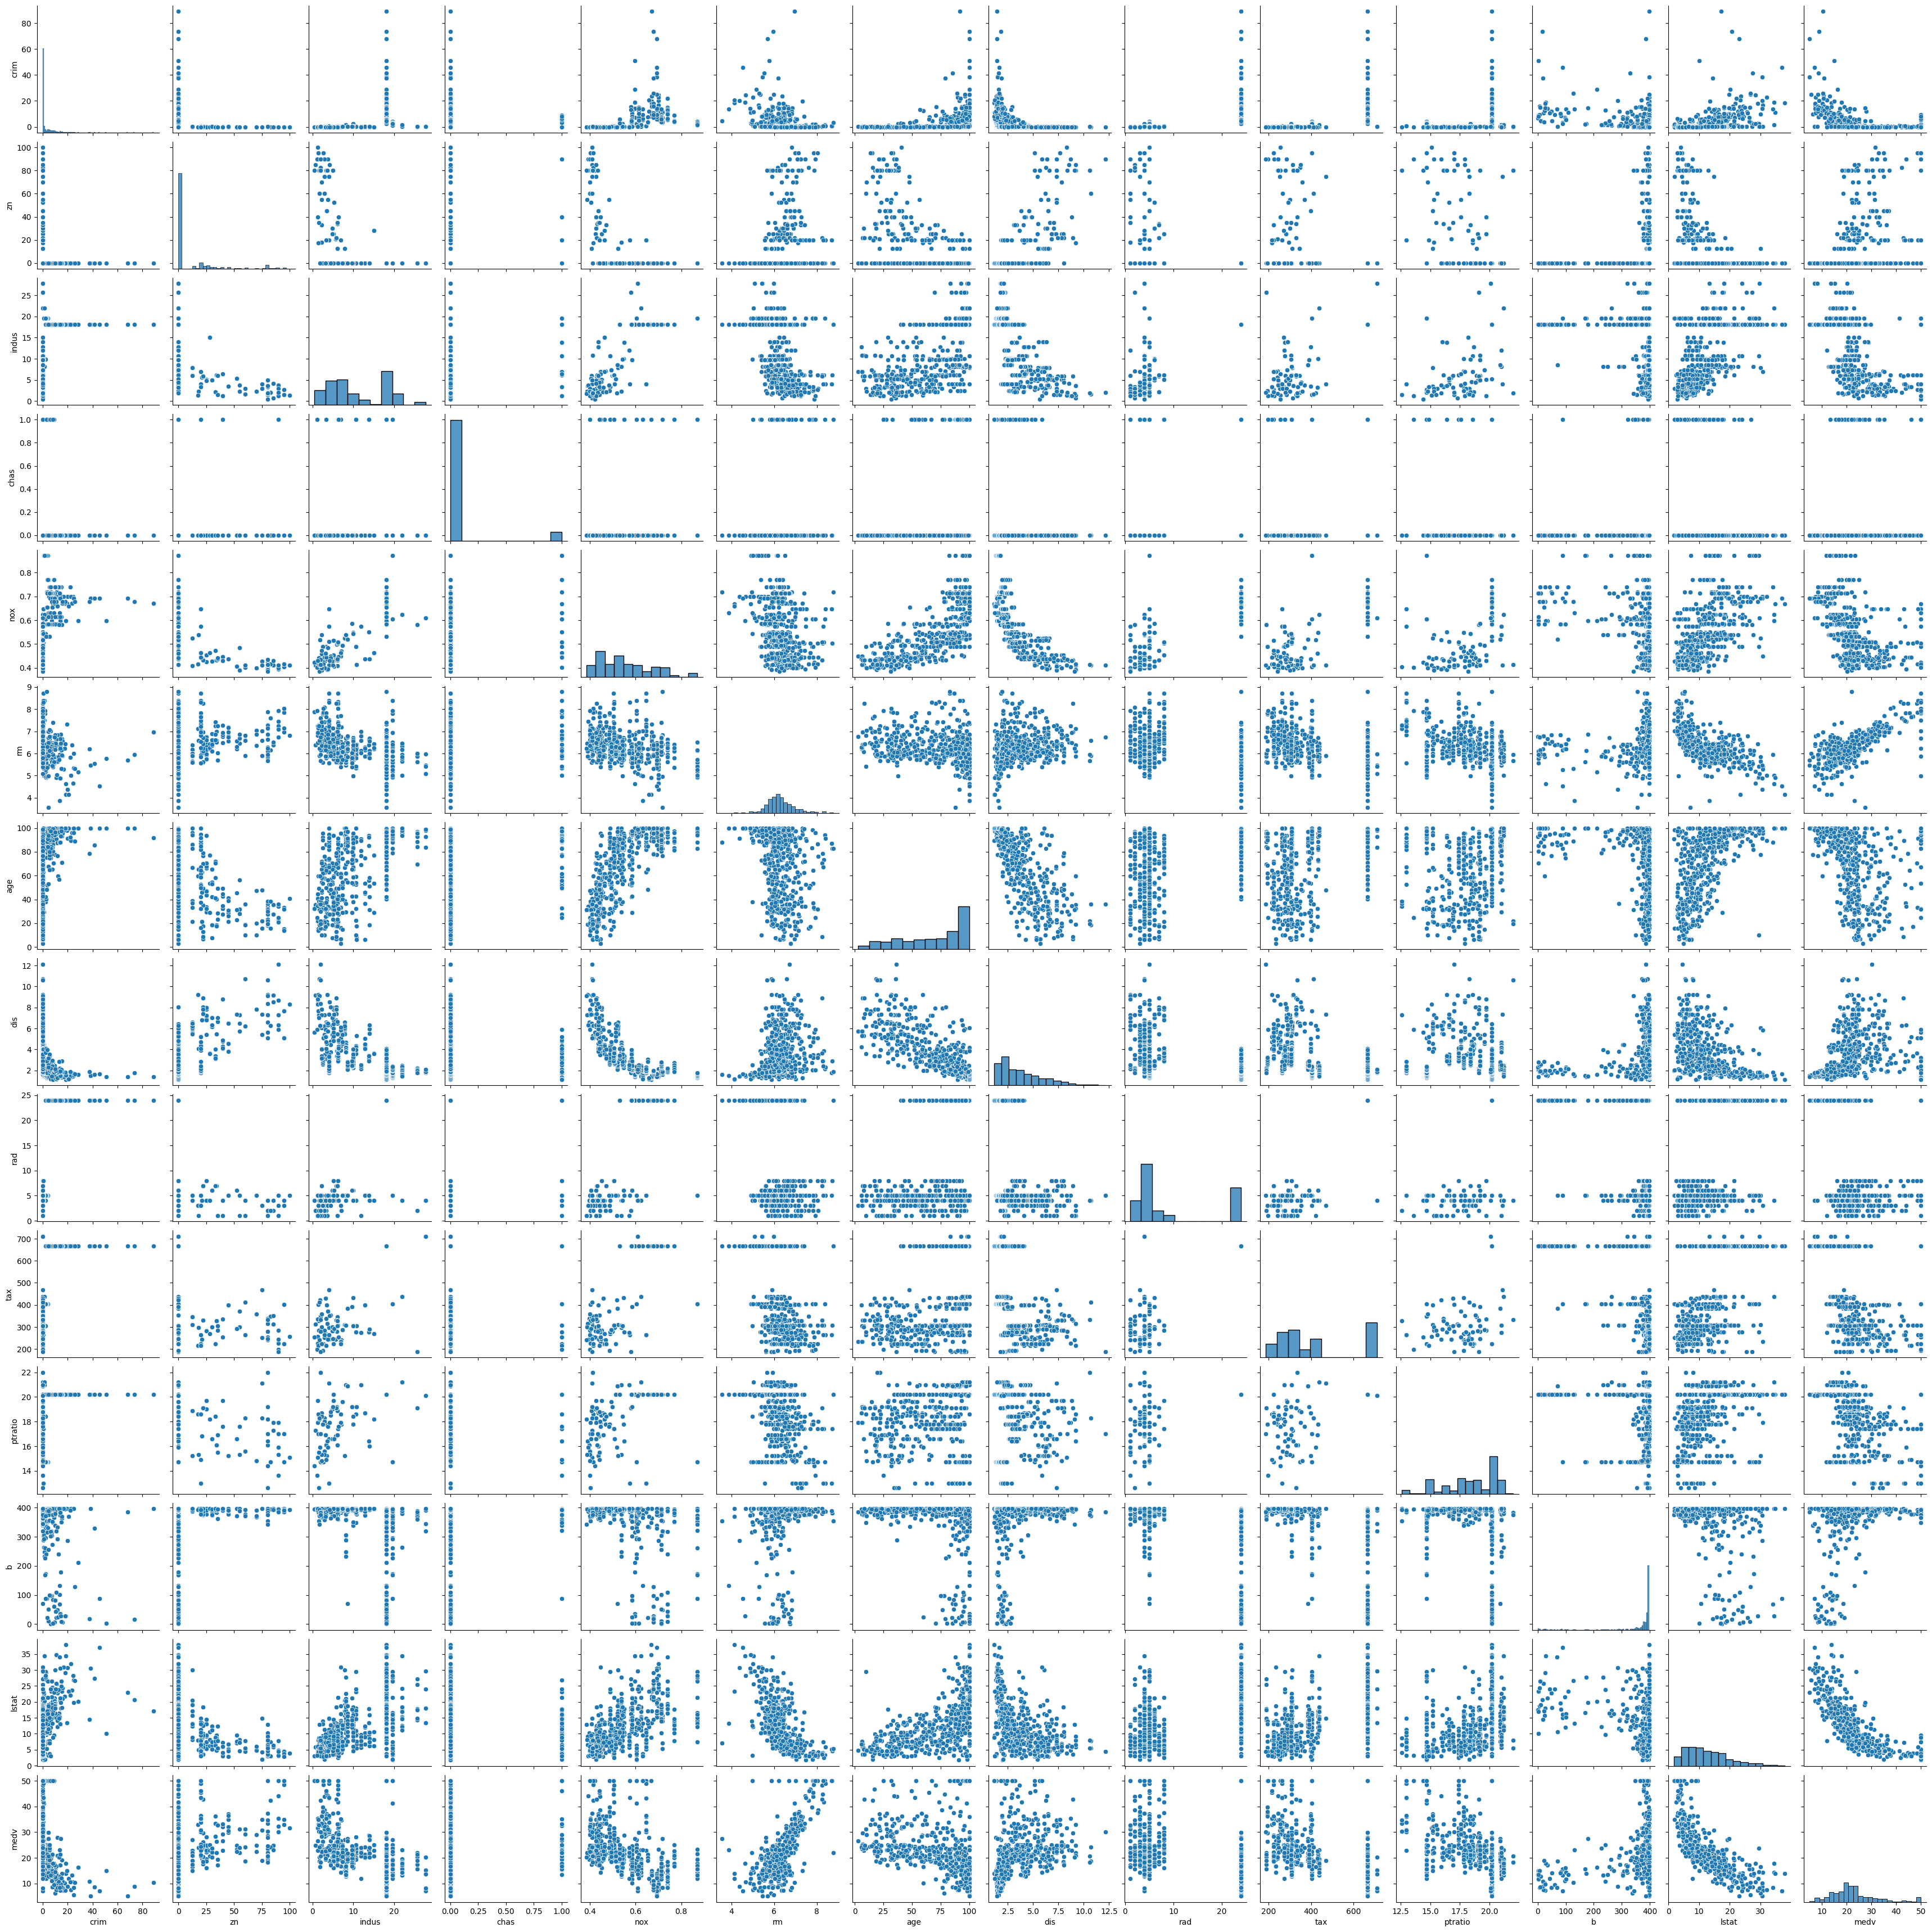

In [ ]:
sns.pairplot(df)

Check the correlation between all pairs of features. Draw a heatmap containing these values. **(S1-8: 5 points)**

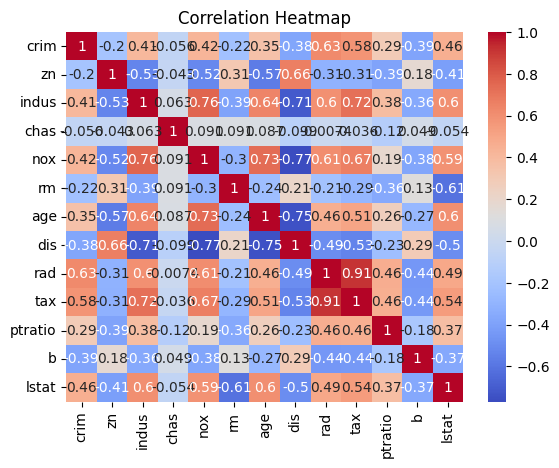

In [ ]:
corr = df.drop(['medv'], axis = 1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation matrix, reduce the number of features to 10. **(S1-9: 5 points)**

In [ ]:
mean_corr = abs(corr.mean())
# corr_matrix = df.corr()
# abs_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
# abs_corr = pd.DataFrame(abs_corr[abs_corr != 1].drop_duplicates(), columns=['abs_corr'])
# top_features = abs_corr.head(10).index.tolist()
# # reduced_df = df[list(set(top_features))]

In [ ]:
df = df.drop(columns=mean_corr.nsmallest(3).index)

In [ ]:
df

,crim,indus,nox,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Sec 2: Data Manipulation and Feature Extraction (10)

Split the dataframe into training and evaluation sets (called `(x_train, y_train)` and `(x_eval, y_eval)`) **(S2-1: 2 points)**

In [ ]:
df_y = df['medv']
df_x = df.drop(['medv'], axis = 1)

In [ ]:
x_train, x_eval, y_train, y_eval = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

Manipulate the training data to make it have unit variance and zero mean **(S2-2: 5 points)**

In [ ]:
scaler = StandardScaler()
x_train_normal = scaler.fit_transform(x_train)

Normalize the evaluation set accordingly **(S2-3: 3 points)**

In [ ]:
x_eval_normal = scaler.fit_transform(x_eval)

# Sec 3: Fitting Models

In this part, we are going to use "pipelines" which are built inside `sklearn`. You are advised to familiarize yourself with them using the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## A: Polynomial Regression (30)

Create 3 pipelines for polynomial regression of different arbitrary degrees. **(S3-1: 5 points)**

In [ ]:
poly_reg_pipe_2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg_pipe_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_reg_pipe_4 = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())

Calculate both the training and evaluation MSE error for each of the models. Finally, store these values in two lists, one containing the error values for the training set and the other one holding the same values for the evaluation set. **(S3-2: 10 points)**

In [ ]:
poly_reg_pipe_2.fit(x_train_normal, y_train)
poly_reg_pipe_3.fit(x_train_normal, y_train)
poly_reg_pipe_4.fit(x_train_normal, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

Plot the degree of the polynomials versus the corresponding MSE errors **(S3-3: 10 points)**

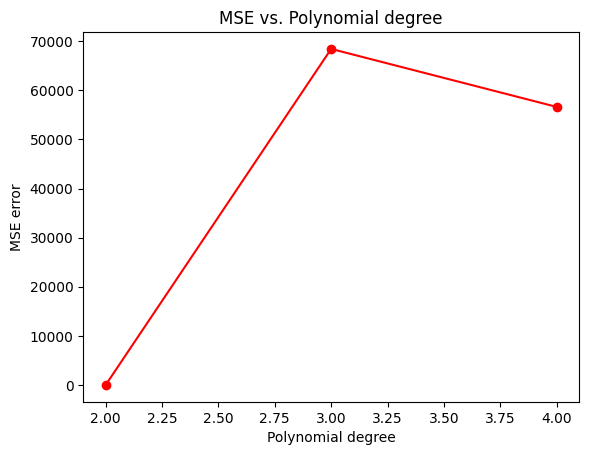

In [ ]:
mse_errors = []
degrees = [2, 3, 4]
y_pred_2 = poly_reg_pipe_2.predict(x_eval_normal)
y_pred_3 = poly_reg_pipe_3.predict(x_eval_normal)
y_pred_4 = poly_reg_pipe_4.predict(x_eval_normal)
mse_2 = mean_squared_error(y_pred_2, y_eval)
mse_3 = mean_squared_error(y_pred_3, y_eval)
mse_4 = mean_squared_error(y_pred_4, y_eval)

mse_errors.append(mse_2)
mse_errors.append(mse_3)
mse_errors.append(mse_4)

plt.plot(degrees, mse_errors, 'ro-')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE error')
plt.title('MSE vs. Polynomial degree')
plt.show()

What is your conclusion? **(S3-4: 5 points)**



Increasing the complexity is not always a good decision!
And increasing complexity to a point is good, but after that
is not proper! (because of over fitting and the concepts that we discussed on first hw)

## B: Splines (30)

Create pipelines for spline regression based on all combinations of values for degree and the number of knots **(S3-5: 5 points)**

In [69]:
knots = range(1,6)
degrees = range(1,6)

combinations = list(itertools.product(degrees, knots))
all_pipelines = []

for degree, knot in combinations:
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    pipeline = make_pipeline(polynomial_features, StandardScaler(), LinearRegression())
    all_pipelines.append(pipeline)

Calculate both the training and evaluation MSE error for each of models and store them in the corresponding pipelines. **(S3-6: 10 points)**

Note: A pipeline is a `dict` object. So, to store something in it, you have to consider a "key" and a "value".

In [70]:
pipeline_train_mse = np.zeros((len(knots), len(degrees)))

In [71]:
pipeline_eval_mse = np.zeros((len(knots), len(degrees)))

In [88]:
import numpy as np
counter = 0
for degree, knot in combinations:
  
  pipeline = all_pipelines[counter]
  counter += 1
  pipeline.fit(x_train_normal, y_train)

  predicts_train = pipeline.predict(x_train_normal)
  predicts_eval = pipeline.predict(x_eval_normal)

  mse_train = mean_squared_error(predicts_train, y_train)
  mse_eval = mean_squared_error(predicts_eval, y_eval)

  pipeline_train_mse[degree - 1, knot - 1] = mse_train
  pipeline_eval_mse[degree - 1, knot - 1] = mse_eval



Plot the joint distribution of training and eval error based on degree and knots **(S3-7: 10 points)**

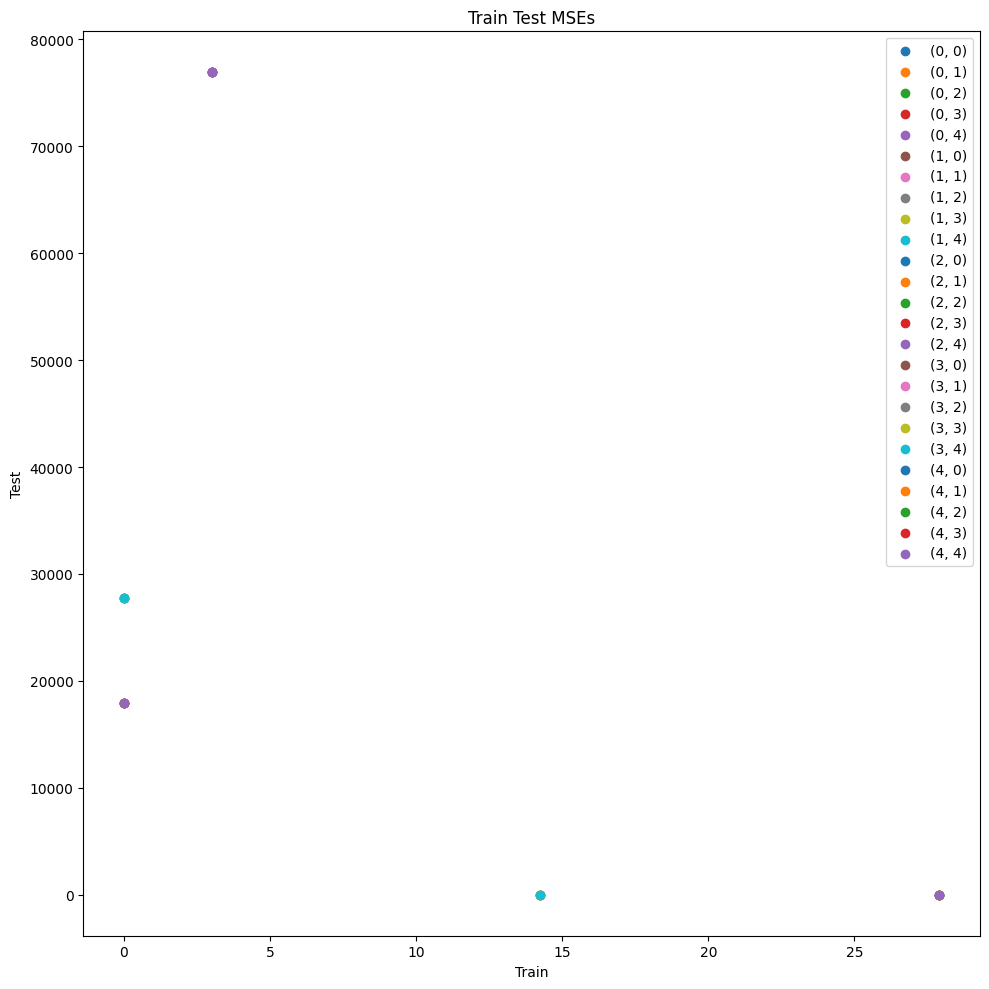

In [89]:
fig, axs = plt.subplots(figsize=(10, 10))

for i in range(len(knots)):
    for j in range(len(degrees)):
        axs.scatter(pipeline_train_mse[i][j], pipeline_eval_mse[i][j], label=f'({i}, {j})')

axs.set_xlabel('Train')
axs.set_ylabel('Test')
axs.set_title('Train Test MSEs')
axs.legend()
plt.tight_layout()
plt.show()

What is your conclusion? **(S3-8: 5 points)**

مطابق با نمودار خروجی، بهترین پیش بینی ها مربوط به درجه و کی نات برابر 
با 4و5 - 5و5 - 2و5 است.

بسیاری از نتایج نیز بر روی هم دقیقا افتاده اند و برای همین نشان داده نمیشوند.

برای همین شاید بهتر باشد اعداد را با فاصله تولید کنیم که پشت سر هم نباشند.

Note that if we increase both parameters it can fit but if we increase it more than usual it may overfit!

If it is less than neccessary is not good, too!